In [5]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [7]:
df = pd.read_csv(
    "../data/acceleration.csv", header=1, parse_dates=["Time"], index_col="Time"
)
df.columns = ["acceleration"]
df["acceleration"] = df["acceleration"].str.replace(" m/s²", "").astype("float32")
# df["acceleration"] = pd.to_numeric(df["acceleration"], downcast="float")
df.head()

,acceleration
Time,
2021-12-09 09:42:35,15.0
2021-12-09 09:43:35,15.5
2021-12-09 09:44:35,15.1
2021-12-09 09:45:35,14.7
2021-12-09 09:46:36,13.0


In [8]:
print(min(df.index), max(df.index))

2021-12-09 09:42:35 2022-06-09 09:41:31


## Train / Test split

In [10]:
split_date = "2022-04-23 00:00:00"
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

<AxesSubplot:title={'center':'Train/Test devide'}, xlabel='Time'>

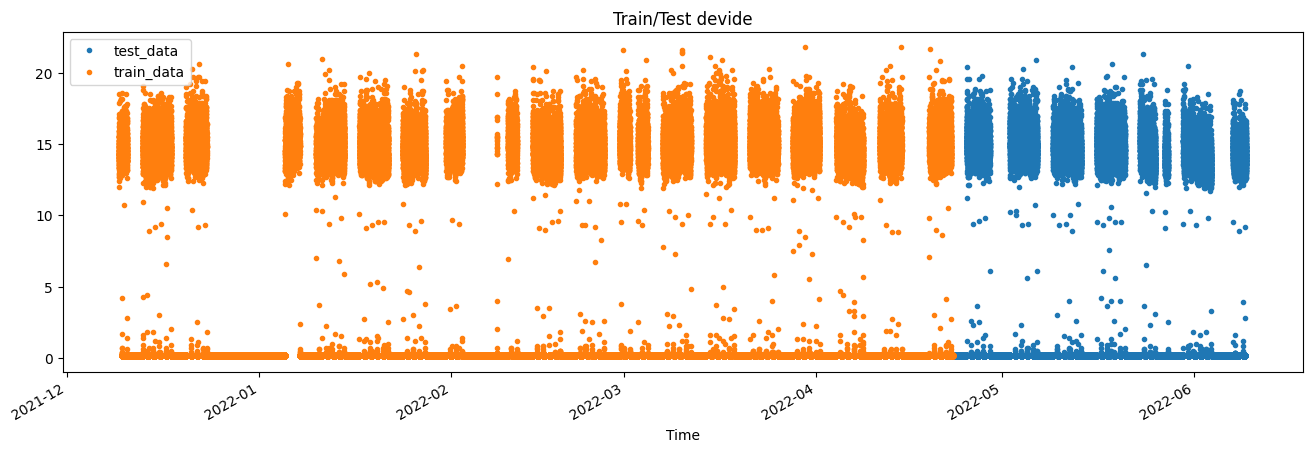

In [11]:
df_test.rename(columns={"acceleration": "test_data"}).join(
    df_train.rename(columns={"acceleration": "train_data"}), how="outer"
).plot(figsize=(16, 5), title="Train/Test devide", style=".")

## Prophet Model
Needs datetime column called ds  
and target value: y  

In [13]:
df_train_prophet = df_train.reset_index().rename(
    columns={"Time": "ds", "acceleration": "y"}
)
df_train_prophet.head()

,ds,y
0,2021-12-09 09:42:35,15.0
1,2021-12-09 09:43:35,15.5
2,2021-12-09 09:44:35,15.1
3,2021-12-09 09:45:35,14.7
4,2021-12-09 09:46:36,13.0


In [15]:
df_test_prophet = df_test.reset_index().rename(
    columns={"Time": "ds", "acceleration": "y"}
)

In [16]:
model = Prophet()
model.fit(df_train_prophet)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:Adding TBB (d:\Python\General\03_Projects\timeseries_iot\venv\lib\site-packages\prophet\stan_model\cmdstan-2.26.1\stan\lib\stan_math\lib\tbb) to PATH
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\joses\AppData\Local\Temp\tmp6ph98t5u\ma1u_b7m.json
DEBUG:cmdstanpy:input tempfile: C:\Users\joses\AppData\Local\Temp\tmp6ph98t5u\b7v4epw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['D:\\Python\\General\\03_Projects\\timeseries_iot\\venv\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=79063', 'data', 'file=C:\\Users\\joses\\AppData\\Local\\Temp\\tmp6ph98t5u\\ma1u_b7m.json', 'init=C:\\Users\\joses\\AppData\\Local\\Temp\\tmp6ph98t5u\\b7v4epw2.json', 'output', 'file=C:\\Users\\joses\\AppData\\Local\\Temp\\tmp6ph98t5u\\prophet_model8w32s0f0\\pro

In [17]:
df_test_forecast = model.predict(df_test_prophet)

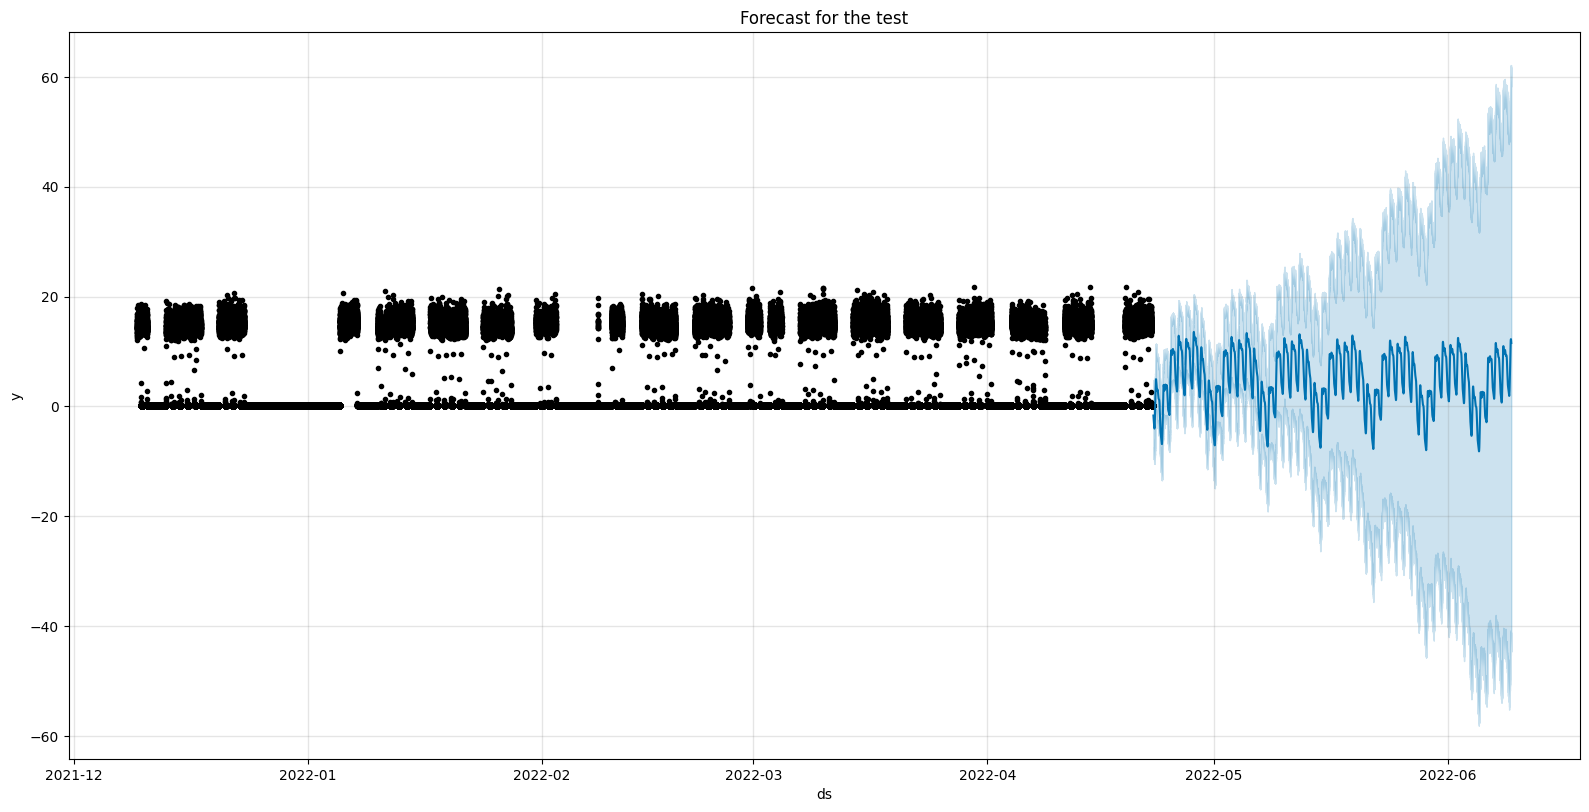

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))
fig = model.plot(df_test_forecast, ax=ax)
ax.set_title("Forecast for the test")
plt.show()

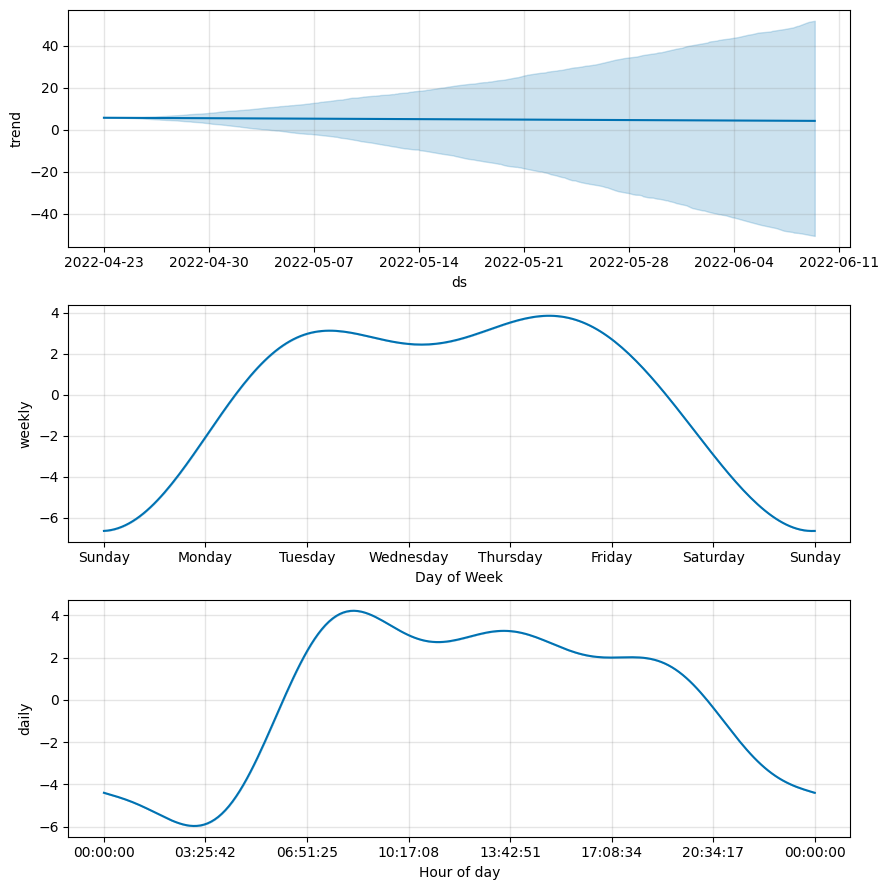

In [19]:
fig = model.plot_components(df_test_forecast)
plt.show()